In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

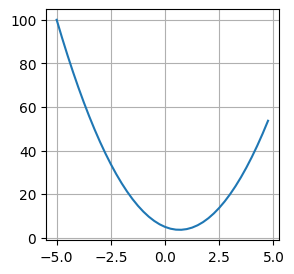

In [3]:
xs = np.arange(-5, 5, 0.25)
y = f(xs)
plt.figure(figsize=(3,3))
plt.plot(xs, y)
plt.grid(True)

In [4]:
# derivative
h = 0.001
x = 3
(f(x + h) - f(x))/h

14.00300000000243

## Micrograd

In [5]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
        
a = Value(2, label='a')
b = Value(-3, label='b')
c = Value(10, label='c')

d = a * b + c
d

Value(data=4)

In [6]:
d._prev

{Value(data=-6), Value(data=10)}

In [7]:
d._op

'+'

In [8]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
#     assert rankdir in ['LR', 'TB']
#     nodes, edges = trace(root)
    dot = Digraph(format="svg", graph_attr={'rankdir': "LR"}) #, node_attr={'rankdir': 'TB'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{ %s | Data %.4f }" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot


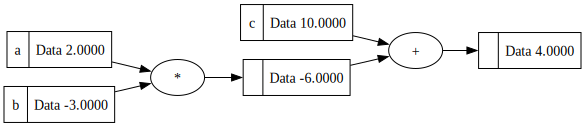

In [9]:
draw_dot(d)